In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("nike_sales_2024.csv")
df.head()

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160


In [3]:
## İstatiksel değerlerini inceliyelim
print(df.describe())

         Units_Sold   Revenue_USD  Online_Sales_Percentage  Retail_Price
count   1000.000000  1.000000e+03              1000.000000    1000.00000
mean   28498.951000  5.039576e+06                70.040000     176.32000
std    12926.495678  3.267217e+06                11.748635      75.26169
min     5028.000000  2.874000e+05                50.000000      50.00000
25%    17554.250000  2.344675e+06                60.000000     110.00000
50%    28685.000000  4.328020e+06                71.000000     180.00000
75%    40026.000000  7.264942e+06                80.000000     240.00000
max    49992.000000  1.486470e+07                90.000000     300.00000


In [4]:
## Boş değerlerin sayısına bakalım
print(df.isnull().sum())

Month                      0
Region                     0
Main_Category              0
Sub_Category               0
Product_Line               0
Price_Tier                 0
Units_Sold                 0
Revenue_USD                0
Online_Sales_Percentage    0
Retail_Price               0
dtype: int64


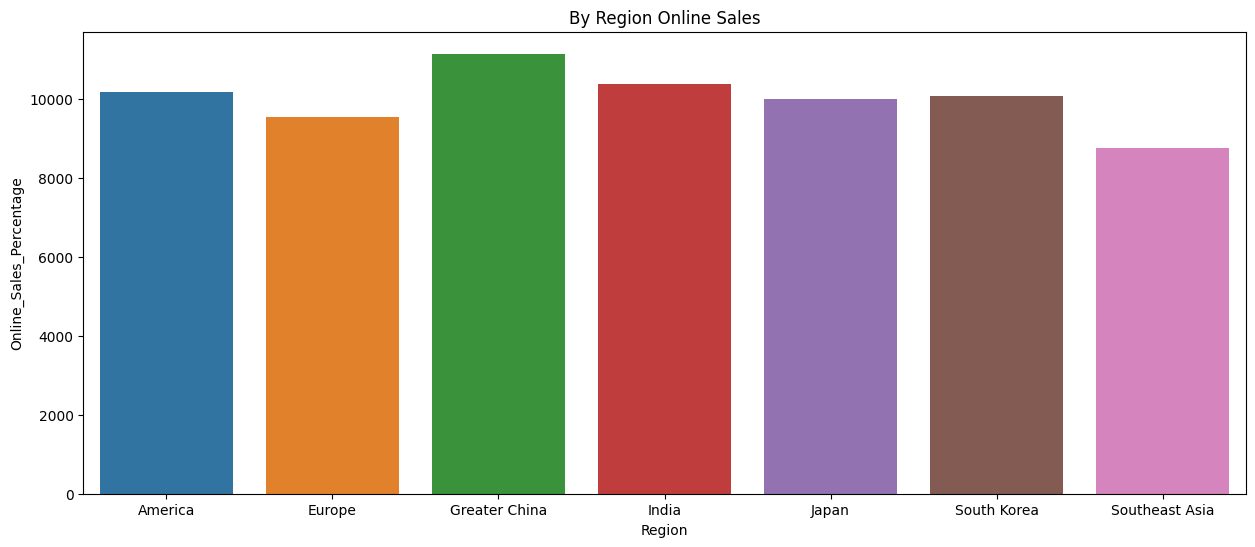

In [5]:
### Burada bölgelerin toplam online alışveriş sayıları bulunmuş olup grafikleştirilmiştir.
df_region_online = df.groupby("Region")[["Online_Sales_Percentage"]].sum().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(x="Region", y="Online_Sales_Percentage", hue="Region", data=df_region_online)
plt.title("By Region Online Sales")
plt.show()

In [13]:
### Burada nike nin her bölgeden ne kadar gelir elde buluyoruz.
df_revenue_usd = df.groupby("Region")[["Revenue_USD"]].sum().reset_index()
px.bar(x="Region", y="Revenue_USD", data_frame=df_revenue_usd, title="By Region Reveue USD")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Region=%{x}<br>Revenue_USD=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['America', 'Europe', 'Greater China', 'India', 'Japan', 'South Korea',
                          'Southeast Asia'], dtype=object),
              'xaxis': 'x',
              'y': array([784640550, 639991140, 804543630, 743029330, 788236410, 699019260,
                          580116090]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'By Region Reveue USD'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Region'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Revenue_USD'}}}
})

In [14]:
df_region_sales = df.groupby("Region")[["Online_Sales_Percentage", "Retail_Price"]].sum().reset_index()
px.bar(x="Region", y=["Online_Sales_Percentage", "Retail_Price"], data_frame=df_region_sales,barmode="group", title="By Region Online Sales and Retail Price")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=Online_Sales_Percentage<br>Region=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Online_Sales_Percentage',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Online_Sales_Percentage',
              'offsetgroup': 'Online_Sales_Percentage',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['America', 'Europe', 'Greater China', 'India', 'Japan', 'South Korea',
                          'Southeast Asia'], dtype=object),
              'xaxis': 'x',
              'y': array([10173,  9545, 11134, 10372,  9998, 10073,  8745]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'variable=Retail_Price<br>Region=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Retail_Price',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Retail_Price',
              'offsetgroup': 'Retail_Price',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['America', 'Europe', 'Greater China', 'India', 'Japan', 'South Korea',
                          'Southeast Asia'], dtype=object),
              'xaxis': 'x',
              'y': array([26580, 23260, 27190, 26170, 27430, 24260, 21430]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'By Region Online Sales and Retail Price'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Region'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [15]:
df.insert(10, "Total_Sales", df["Online_Sales_Percentage"] + df["Retail_Price"])

In [16]:
df.head()

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price,Total_Sales
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300,373
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210,260
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70,160
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210,268
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160,213


Text(0.5, 1.0, 'By Month Total Sales')

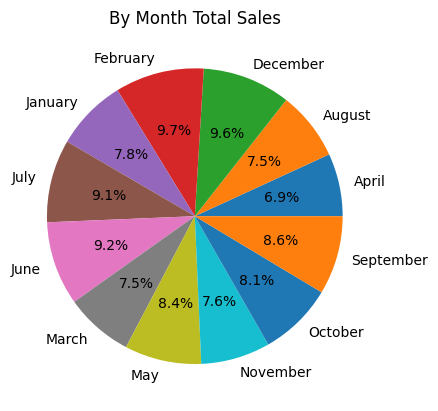

In [18]:
### Burada aylara göre toplam satış yüzdesi karşılaştırmıştır
df_month_sales = df.groupby("Month")[["Total_Sales"]].sum().reset_index()
plt.pie(df_month_sales["Total_Sales"], labels=df_month_sales["Month"], autopct="%1.1f%%")
plt.title("By Month Total Sales")

In [19]:
print(df["Revenue_USD"].std())

3267216.8126556757
